<a href="https://colab.research.google.com/github/sleepynayng/DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (Convolution Neural Network)

<p> 컨볼루션 연산 --> 각 픽셀을 해당 픽셀과 주변 픽셀의 조합으로 대체하여 Feature Extraction 진행 <p>
<p> 컨볼루션 연산의 중간 결과로 나오는 행렬들을 필터(filter)나 커널(kernal)이라고 함 <p>
<p> Convolution Network = Feature Extractor + Classifier </p>
<ul> 
    <li>특징추출기(Feature Extractor) : ConvLayer + PoolLayer </li> 
    <li>분류기(Classifier) : FlattenLayer + DenseLayer (+ DropoutLayer) </li>
</ul>

<h3> Feature Extractor </h3>
<h5> ConvLayer : 각 채널에 대해 계산된 값을 합쳐서 새로운 이미지를 생성 </h5>
<p> 컨볼루션 연산을 위한 필터는 사람이 지정하는 것이 아닌 네트워크 학습을 통해 자동으로 추출 <br> 이미지(Image) : 이미지는 채널로 구성되어 있으며 보통 흑백은 1개의 채널 컬러 이미지는 3개의 채널을 가지고 있음 </p>
<p> tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding="valid", filters=16) 
    <li> kernel_size : 필터 행렬의 크기로 (4,3)인 경우 높이는 4 너비가 3인 필터 행렬 생성 </li>
    <li> strides : 필터가 계산하는 과정에서 스텝마다 이동하는 크기로 기본값은 (1,1) </li>
    <li> padding : 컨볼루션 연산 전 입력 이미지 주변에 빈 값을 넣을지 지정하는 옵션 </li>
    <li> filters : 필터의 개수 </li>
</p>

<h5> PoolLayer : 이미지의 크기를 줄이면서 중요한 데이터만 남기는 레이어 </h5>
<p> 이미지를 구성하는 픽셀 중 인접한 픽셀들은 비슷한 정보를 가질 확률이 높아 이미지의 크기를 줄이면서 중요한 정보만 남기기위해 <br> 서브샘플링이라는 기법을 사용하는 방식과 유사하며 Max Pooling layer, Average Pooling Layer 등이 존재 </p>
<p> tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=c(2,2)) 
    <li> pool_size : 한번에 Max 연산을 수행할 범위로 (2,2)이면 높이가 2 너비 2인 사각형에서 최댓값만 남김 </li>
    <li> strides : 풀링 과정에서 한 스텝마다 이동하는 크기 </li>
</p>
   

<h3> Drop out </h3>
<p> 드롭아웃은 학습과정에서 무작위로 뉴론의 부분집합을 제거하는 레이어로 과적합을 방지하기 위해서 사용 </p>
<p> <li> tf.keras.layers.Dropout(rate) </li> </p>
<img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/2-1-2048x745-1.jpg" height="500" width="550"> </img>

<h3> Fashion MNIST 데이터세트 </h3>
<ul> Fashion MNIST 범주 
    <li> 0 : 티셔츠/상의</li>
    <li> 1 : 바지</li>
    <li> 2 : 스웨터</li>
    <li> 3 : 드레스</li>
    <li> 4 : 코트</li>
    <li> 5 : 샌들</li>
    <li> 6 : 셔츠</li>
    <li> 7 : 운동화</li>
    <li> 8 : 가방</li>
    <li> 9 : 부츠</li>
</ul>

In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Min-Max Normalization
train_x = train_x / 255.0
test_x = test_x / 255.0

In [ ]:
# 채널을 가지도록 shape 변경 (28,28) -> (28,28,1)
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

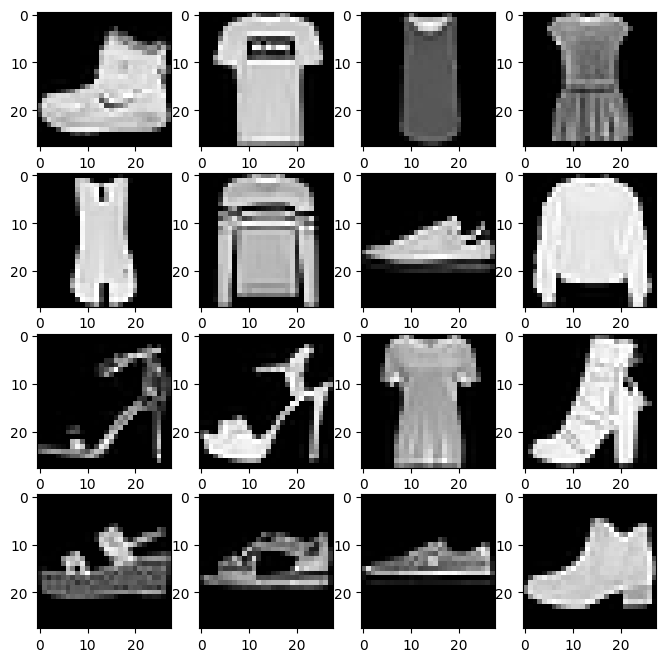

In [ ]:
# Visualization Dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for c in range(4*4) : 
    plt.subplot(4,4,c+1)
    plt.imshow(train_x[c].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
# Model Structure
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25


2022-12-28 19:04:50.957602: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1407/1407 [==============================] - 22s 15ms/step - loss: 0.4647 - accuracy: 0.8324 - val_loss: 0.3809 - val_accuracy: 0.8633
Epoch 2/25
1407/1407 [==============================] - 22s 16ms/step - loss: 0.3391 - accuracy: 0.8773 - val_loss: 0.3818 - val_accuracy: 0.8578
Epoch 3/25
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2841 - accuracy: 0.8950 - val_loss: 0.3744 - val_accuracy: 0.8673
Epoch 4/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2441 - accuracy: 0.9096 - val_loss: 0.4149 - val_accuracy: 0.8695
Epoch 5/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2121 - accuracy: 0.9211 - val_loss: 0.4374 - val_accuracy: 0.8691
Epoch 6/25
1407/1407 [==============================] - 23s 17ms/step - loss: 0.1821 - accuracy: 0.9312 - val_loss: 0.5153 - val_accuracy: 0.8599
Epoch 7/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1616 - accuracy: 0.9401 - val_loss: 0.5345 - val_accura

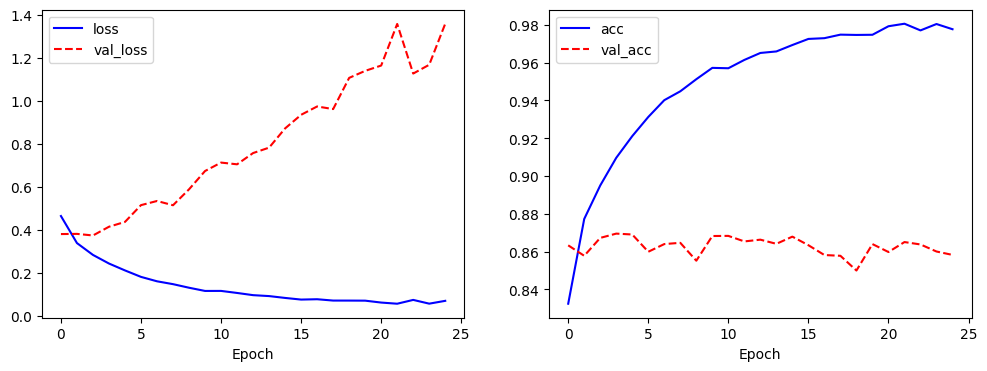

In [ ]:
# Visualization of model
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], "b-", label="loss")
plt.plot(history.history['val_loss'], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 1.3959 - accuracy: 0.8585


[1.3958760499954224, 0.8585000038146973]

In [ ]:
# Model Structure
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size = (3,3), filters = 32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = "relu"),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation = "softmax")])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [ ]:
# model fitting
history = model2.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 11s 7ms/step - loss: 0.5252 - accuracy: 0.8082 - val_loss: 0.3792 - val_accuracy: 0.8605
Epoch 2/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3575 - accuracy: 0.8713 - val_loss: 0.3366 - val_accuracy: 0.8760
Epoch 3/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3160 - accuracy: 0.8863 - val_loss: 0.3062 - val_accuracy: 0.8858
Epoch 4/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2886 - accuracy: 0.8950 - val_loss: 0.3075 - val_accuracy: 0.8885
Epoch 5/25
1407/1407 [==============================] - 11s 8ms/step - loss: 0.2649 - accuracy: 0.9033 - val_loss: 0.2967 - val_accuracy: 0.8937
Epoch 6/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2515 - accuracy: 0.9081 - val_loss: 0.2972 - val_accuracy: 0.8964
Epoch 7/25
1407/1407 [==============================] - 12s 8ms/step - loss: 0.2354 - accuracy: 0.9142 - val_loss: 0.2949 - val_ac

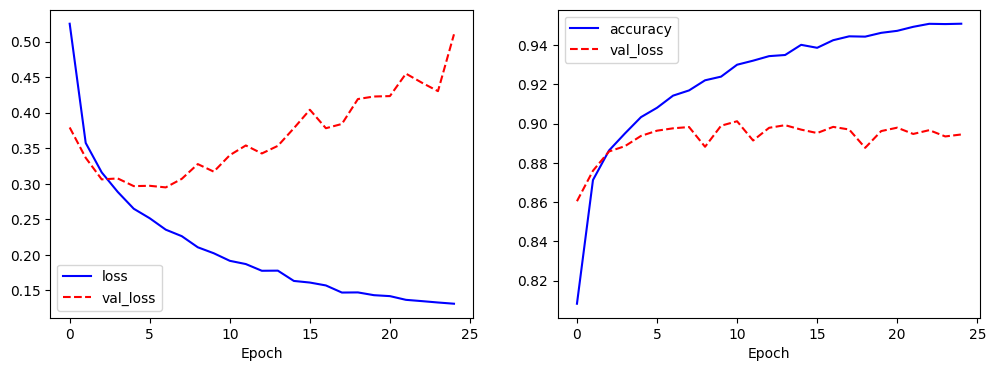

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="accuracy")
plt.plot(history.history["val_accuracy"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
# VGG-19 like Style model
# --> (conv2D 2times + pool 1times)*2times + (conv2D 4times + pool 1times)*3times
model_vgg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32,
                           padding = "same", activation = "relu"),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")])

model_vgg.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss = tf.keras.losses.sparse_categorical_crossentropy,
                  metrics = ['accuracy'])
model_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 256)       295168    
                                                      

In [ ]:
history = model_vgg.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 90s 64ms/step - loss: 0.5746 - accuracy: 0.7917 - val_loss: 0.3285 - val_accuracy: 0.8805
Epoch 2/25
1407/1407 [==============================] - 90s 64ms/step - loss: 0.3634 - accuracy: 0.8694 - val_loss: 0.2724 - val_accuracy: 0.9007
Epoch 3/25
1407/1407 [==============================] - 91s 65ms/step - loss: 0.3181 - accuracy: 0.8850 - val_loss: 0.2448 - val_accuracy: 0.9087
Epoch 4/25
1407/1407 [==============================] - 286s 203ms/step - loss: 0.2967 - accuracy: 0.8937 - val_loss: 0.2300 - val_accuracy: 0.9157
Epoch 5/25
1407/1407 [==============================] - 340s 242ms/step - loss: 0.2817 - accuracy: 0.8992 - val_loss: 0.2312 - val_accuracy: 0.9176
Epoch 6/25
1407/1407 [==============================] - 407s 290ms/step - loss: 0.2665 - accuracy: 0.9041 - val_loss: 0.2460 - val_accuracy: 0.9100
Epoch 7/25
1407/1407 [==============================] - 93s 66ms/step - loss: 0.2609 - accuracy: 0.9072 - val_loss: 0.

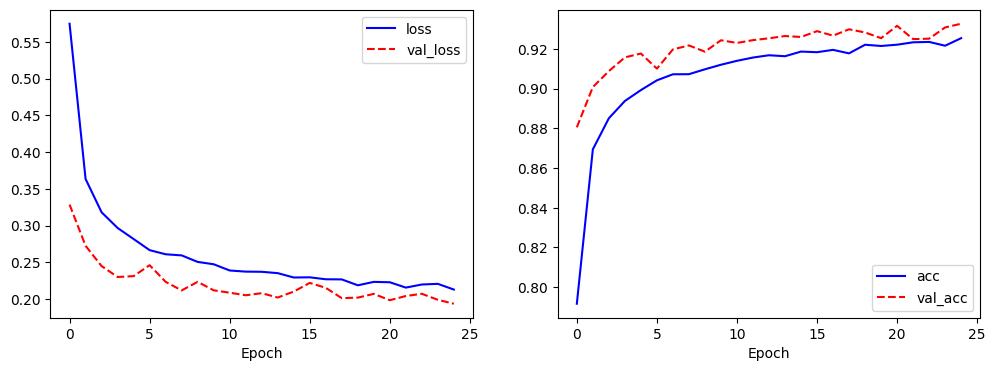

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
model_vgg.evaluate(test_x, test_y)

313/313 [==============================] - 6s 18ms/step - loss: 0.2116 - accuracy: 0.9280


[0.2115740180015564, 0.9279999732971191]

# 

<h3> Image Augmentation </h3>
<p> 이미지보강 : 훈련 데이터에 없는 이미지를 새롭게 만들어내서 훈련데이터를 보강하는 방법으로 주로 이미지 확대/축소 및 회전등을 통해 얻음 <br>
    tensorflow.keras.preprocessing.image의 ImageDataGenerator를 사용해 수행할 수 있음<br>
    <ul>
        <li> horizontal_flip : 가로축 회전 </li>
        <li> vertical_flip : 세로축 회전</li>
        <li> rotation_range : 회전 정도</li>
        <li> zoom_range : 확대 정도</li>
        <li> shear_range : 기울임 정도</li>
        <li> width_shift_range : 너비 이동 정도</li>
        <li> height_shift_range : 높이 이동 정도</li>
    </ul>
</p>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.3,
    shear_range = 0.5,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True)

augment_size = 100
x_augmented = image_generator.flow(np.tile(train_x[0].reshape(28*28), 100).reshape(-1,28,28,1),
                                          np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

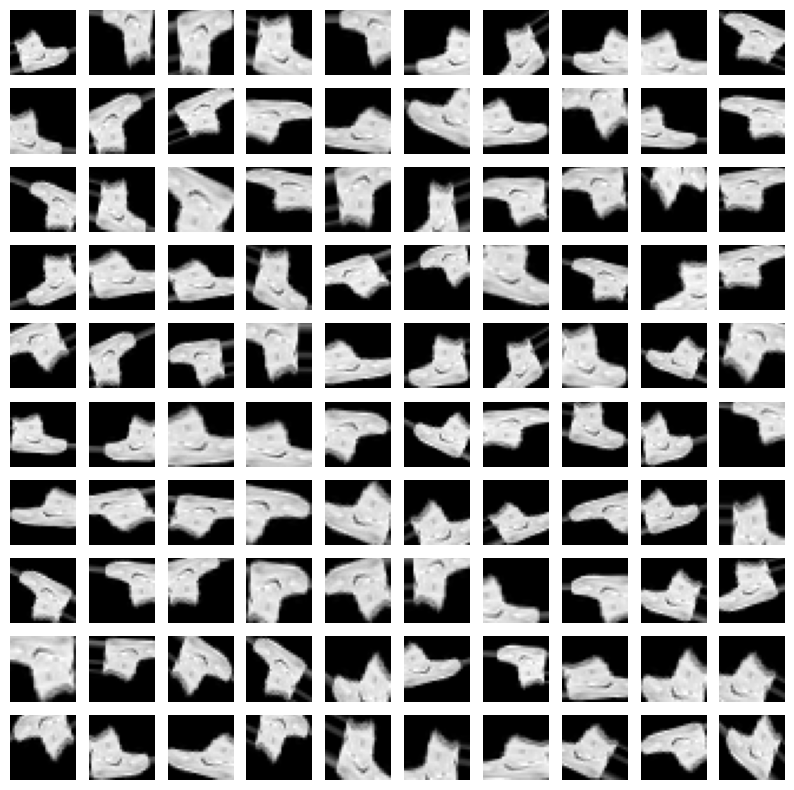

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for c in range(100) :
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
augment_size = 30000
index = np.random.randint(train_x.shape[0], size=augment_size)
x_augmented = train_x[index].copy()
y_augmented = train_y[index].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                  batch_size=augment_size, shuffle=False).next()[0]

In [ ]:
train_x = np.concatenate((train_x, x_augmented))
train_y = np.concatenate((train_y, y_augmented))
print(train_x.shape)

(90000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation="relu"),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 256)       295168    
                                                      

In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
2110/2110 [==============================] - 113s 54ms/step - loss: 0.6810 - accuracy: 0.7519 - val_loss: 1.3076 - val_accuracy: 0.5029
Epoch 2/25
2110/2110 [==============================] - 114s 54ms/step - loss: 0.4789 - accuracy: 0.8264 - val_loss: 1.1527 - val_accuracy: 0.5590
Epoch 3/25
1684/2110 [======================>.......] - ETA: 20s - loss: 0.4297 - accuracy: 0.8441

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label='acc')
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()